In [7]:
import pandas as pd
df = pd.read_csv("C:/Users/heith/Downloads/archive/creditcard.csv")

print(df.shape)      
print(df.columns)  

(284807, 31)
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [8]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [10]:
print(df.isnull().values.any())

False


In [11]:
print(df.duplicated().sum())

1081


In [15]:
duplicates=df[df.duplicated()]
print(duplicates['Class'].value_counts())

Class
0    1062
1      19
Name: count, dtype: int64


In [16]:
duplicates_normal = duplicates[duplicates['Class']==0]
df_cleaned = df.drop(duplicates_normal.index)
duplicates_1 = df_cleaned[df_cleaned.duplicated()]
print(duplicates_1['Class'].value_counts())

Class
1    19
Name: count, dtype: int64


C:\Users\heith\AppData\Local\Temp\ipykernel_7204\2840800599.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='Class' ,palette='Set2')


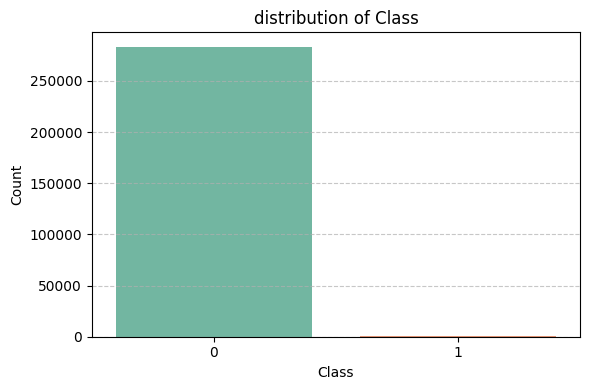

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize=(6,4))
sns.countplot(data=df_cleaned, x='Class' ,palette='Set2')
plt.title('distribution of Class')
plt.ylabel('Count')
plt.xlabel('Class')
plt.grid(axis='y' , linestyle='--' , alpha=0.7)
plt.tight_layout()
plt.show()

In [21]:
import imblearn
print(imblearn.__version__)

0.13.0


In [22]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter



# 2. فصل السمات عن الهدف
X = df_cleaned.drop('Class', axis=1)
y = df_cleaned['Class']

# 3. عرض التوزيع قبل SMOTE
print("قبل SMOTE:", Counter(y))

# 4. تقسيم البيانات أولاً لتجنب تسريب البيانات (اختياري لكن موصى به)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 5. تطبيق SMOTE فقط على بيانات التدريب
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 6. عرض التوزيع بعد SMOTE
print("بعد SMOTE:", Counter(y_resampled))

قبل SMOTE: Counter({0: 283253, 1: 492})
بعد SMOTE: Counter({0: 226602, 1: 226602})


In [24]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 1. فصل الميزات والهدف
X = df_cleaned.drop('Class', axis=1)
y = df_cleaned['Class']

# 2. تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3. التوزيع قبل SMOTE
print("قبل SMOTE:", Counter(y_train))

# 4. تطبيق SMOTE على بيانات التدريب فقط
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 5. التوزيع بعد SMOTE
print("بعد SMOTE:", Counter(y_resampled))

# 6. تدريب نموذج RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_resampled, y_resampled)

# 7. التنبؤ على مجموعة الاختبار الأصلية
y_pred = model.predict(X_test)

# 8. التقييم
print("\n✅ تقرير التصنيف:")
print(classification_report(y_test, y_pred, digits=4))

print("✅ مصفوفة الالتباس:")
print(confusion_matrix(y_test, y_pred))

print("✅ ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

قبل SMOTE: Counter({0: 226602, 1: 394})
بعد SMOTE: Counter({0: 226602, 1: 226602})

✅ تقرير التصنيف:
              precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     56651
           1     0.9067    0.6939    0.7861        98

    accuracy                         0.9993     56749
   macro avg     0.9531    0.8469    0.8929     56749
weighted avg     0.9993    0.9993    0.9993     56749

✅ مصفوفة الالتباس:
[[56644     7]
 [   30    68]]
✅ ROC-AUC Score: 0.9455605193128425


In [26]:
import xgboost
print(xgboost.__version__)

3.0.2


In [27]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from collections import Counter

# تأكد أن لديك البيانات الموزونة X_resampled و y_resampled
print("البيانات بعد SMOTE:", Counter(y_resampled))

# تقسيم البيانات
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# نموذج XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# شبكة المعاملات
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1]
}

# ضبط المعاملات
grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='f1', verbose=2, n_jobs=-1)
grid.fit(X_train, y_train)

# أفضل نموذج
best_model = grid.best_estimator_
print("✅ أفضل معاملات:", grid.best_params_)

# التقييم
y_pred = best_model.predict(X_test)

print("\n✅ تقرير التصنيف:")
print(classification_report(y_test, y_pred))

print("✅ مصفوفة الالتباس:")
print(confusion_matrix(y_test, y_pred))

roc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1])
print(f"✅ ROC-AUC Score: {roc}")

البيانات بعد SMOTE: Counter({0: 226602, 1: 226602})
Fitting 3 folds for each of 16 candidates, totalling 48 fits


C:\Users\heith\miniconda3\envs\ai-env\lib\site-packages\xgboost\training.py:183: UserWarning: [16:24:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ أفضل معاملات: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}

✅ تقرير التصنيف:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45321
           1       1.00      1.00      1.00     45320

    accuracy                           1.00     90641
   macro avg       1.00      1.00      1.00     90641
weighted avg       1.00      1.00      1.00     90641

✅ مصفوفة الالتباس:
[[45308    13]
 [    0 45320]]
✅ ROC-AUC Score: 0.9999979663552487
